### Exploratory Data Analysis

### Data Pre-Processing

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd

df_matches = pd.read_csv("matches.csv")
df_matches.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN


In [2]:
df_deliveries = pd.read_csv("deliveries.csv")
df_deliveries.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN


In [3]:
print(df_matches.shape)
print(df_deliveries.shape)

(756, 18)
(179078, 21)


In matches data frame columns like umpire1,umpire2,umpire3 are not useful because these days they are using technology. So we cant decide which umpire is more useful for predicting anything related to match.

Date is also not useful because we already have season column which is also almost equal to date.

City and venue also not important features for this year IPL. Because IPL2020 is happening in UAE, only 2014 ipl was happened in UAE that to half season. But i am removing only venue it almost equal to city feature.

'Result' feature is almost equal to 'winner' feature. So i am dropping result column also.

In [4]:
df_matches = df_matches.drop(['venue','date','result','umpire1','umpire2','umpire3'], axis = 1) 
df_matches.head(2)

,id,season,city,team1,team2,toss_winner,toss_decision,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match
0,1,2017,Hyderabad,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,0,Sunrisers Hyderabad,35,0,Yuvraj Singh
1,2,2017,Pune,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,0,Rising Pune Supergiant,0,7,SPD Smith


In [5]:
print(df_matches["team1"].value_counts())

Mumbai Indians                 101
Kings XI Punjab                 91
Chennai Super Kings             89
Royal Challengers Bangalore     85
Kolkata Knight Riders           83
Delhi Daredevils                72
Rajasthan Royals                67
Sunrisers Hyderabad             63
Deccan Chargers                 43
Pune Warriors                   20
Gujarat Lions                   14
Rising Pune Supergiant           8
Rising Pune Supergiants          7
Kochi Tuskers Kerala             7
Delhi Capitals                   6
Name: team1, dtype: int64


In [6]:
#In 2019 delhi daredevils name changed to delhi capitals. So i am replacing old name with new name for all the rows.
df_matches = df_matches.replace(to_replace ="Delhi Daredevils", value = "Delhi Capitals") 

df_deliveries = df_deliveries.replace(to_replace = "Delhi Daredevils", value = "Delhi Capitals")

#Rising pune supergiants name also printed in two ways. Lets change it to Rising pune supergiants.
df_matches = df_matches.replace(to_replace ="Rising Pune Supergiant", value = "Rising Pune Supergiants") 

df_deliveries = df_deliveries.replace(to_replace = "Rising Pune Supergiant", value = "Rising Pune Supergiants")

In [7]:
#checking null values in matches dataset
print(df_matches.isnull().sum())

id                 0
season             0
city               7
team1              0
team2              0
toss_winner        0
toss_decision      0
dl_applied         0
winner             4
win_by_runs        0
win_by_wickets     0
player_of_match    4
dtype: int64


In [8]:
#printing null rows in matches dataset
df1_null = df_matches[df_matches.isna().any(axis=1)]
df1_null.head(2)

,id,season,city,team1,team2,toss_winner,toss_decision,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match
300,301,2011,Delhi,Delhi Capitals,Pune Warriors,Delhi Capitals,bat,0,NaN,0,0,NaN
461,462,2014,NaN,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,0,Royal Challengers Bangalore,0,7,PA Patel


In [9]:
#After seeing above table we can clearly understood that 4 matches are not played beacuse of rain, badlight or pitch condition. 
#So i am replacing those null values in winner column with no result and palyer of the match column null values with not declared.
df_matches["winner"].fillna("No result", inplace = True)
df_matches['player_of_match'].fillna("Not declared", inplace = True)
#city column also has 7 null values. I checked those matches data in Espn website and they played in Dubai.
df_matches["city"].fillna("Dubai", inplace = True)
print(df_matches.shape)

(756, 12)


In [10]:
#checking null values in deliveries dataset
print(df_deliveries.isnull().sum())

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64


Player_dismissed, dismissal_kind and fielder features are having null values. But if you consider today questions only 'player_dismissed' and 'dismissal_kind' features are useful for today analysis. So i am removing "fielder" feature.

Filling player_dismissed null values with 'No wicket', didmissal_Kind null values with also No Wicket

In [11]:
#dropping fielder column
df_deliveries = df_deliveries.drop(['fielder'], axis = 1) 
#filling null values
df_deliveries["player_dismissed"].fillna("No Wicket", inplace = True)
df_deliveries["dismissal_kind"].fillna("No Wicket", inplace = True)
df_deliveries.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,No Wicket,No Wicket
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,No Wicket,No Wicket


In [12]:
# list of dtypes to include 
include =['float', 'int']
desc = df_deliveries.describe(include = include)
desc

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


I think there are no outliers present in overs column but in balls column balls range is between(0-9), it happens if bowlers balls extra deliveries.

In innings column maximum value is 5 so there are some outliers presented. Because there are 2 innings per match, if match tied then they will conduct one super over till last season. So maximum number of innings is 4.

And in remaining columns max value is in certain limit only. So i can say there are not much outliers.

### Q1) Who will win today match MI VS CSK?

In [205]:
# Lets check winning ratio between MI VS CSK
df_MI_CSK = df_matches[((df_matches['team1'] == 'Mumbai Indians') | (df_matches['team1'] == 'Chennai Super Kings')) & 
                         ((df_matches['team2'] == 'Mumbai Indians') | (df_matches['team2'] == 'Chennai Super Kings'))] 

#plotting MI and CSK wins against each other
import plotly.graph_objs as go
df_winner = df_MI_CSK[['id','winner']].groupby('winner').size().reset_index()
df_winner.columns = ['winner','total_wins']
df_winner = df_winner.sort_values('total_wins',ascending=False)

data = go.Bar(x = df_winner['winner'],y = df_winner['total_wins'])
layout = go.Layout(title = 'Number of wins by MI and CSK against each other',xaxis = dict(title = 'Team'),yaxis = dict(title = 'No of wins'))
fig = go.Figure(data = data,layout = layout)
fig.show()

**Conclusion :-**

Out of 28 head-head matches Mumbai won 17 and CSk won 11. Mumbai almost won70% of the matches and also as per my cricket knowledge mumbai and CSK is almost same teams from 2018 onwards so i am predicting in today match also MI will win.

### Q2) How many runs will quinton decock will score off boundaries in the first   10 balls he faces? If he doesnt face 10 balls and gets out before then the number of runs he scored off boundaries until the point he got out will be  considered? 

In [27]:
#Filtering out decock from batsman column and not taking wide deliveries
df_Decock = df_deliveries[(df_deliveries['batsman'] == 'Q de Kock') & (df_deliveries['wide_runs'] == 0)]
df_Decock['batsman_runs'].value_counts()

0    435
1    408
4    156
6     54
2     53
3      4
5      1
Name: batsman_runs, dtype: int64

If you look at above values for quinton decock batsman runs it has 4,5,6.
Actually 4,6 are boundaries but some times if fielder throws overthrow and ball went to to boundary at the same time if batsman ran 1 run then total batsman runs will become 5. We have only 1 value i.e batsman runs =5. So i am considering that as outlier.

In [111]:
#But we have only 1 value for batsman runs = 5. So i am not considering that values.
runs_list = df_Decock['batsman_runs'].to_list()
balls_list = df_Decock['ball'].to_list()
matchid_list = df_Decock['match_id'].to_list()

listoflists = []
listoflists.append(matchid_list)
listoflists.append(runs_list)
listoflists.append(balls_list)

Decock_runs_scored = []
Decock_matchID = []
balls_faced = 0
sum = 0

for i in range(len(listoflists[0])-1):
  balls_faced = balls_faced + 1
  if listoflists[0][i] != listoflists[0][i+1] :
     Decock_runs_scored.append(sum)
     Decock_matchID.append(listoflists[0][i])
     balls_faced = 0
     sum = 0
  elif (listoflists[1][i] == 4 or listoflists[1][i] == 6) and balls_faced <= 10 :
     sum = sum + (listoflists[1][i])
     if balls_faced == 10 or listoflists[0][i] != listoflists[0][i+1]:   #Here i am checking if decock faced 10 balls or he got out before 10balls.
        if listoflists[0][i] not in Decock_matchID:   
           Decock_runs_scored.append(sum)
           Decock_matchID.append(listoflists[0][i])
           sum = 0
           balls_faced = 0

#Printing number of runs scored by Decock in each match for 1st 10 balls via boundaries 
print("Runs scored by decock through boundary for 1st 10balls  =",Decock_runs_scored,"\n")
print("Corresponding Matchid =",Decock_matchID)


Runs scored by decock through boundary for 1st 10balls  = [0, 0, 4, 4, 8, 0, 8, 14, 8, 10, 8, 0, 4, 12, 0, 8, 16, 10, 4, 20, 8, 4, 0, 0, 8, 4, 8, 6, 0, 0, 4, 4, 8, 12, 4, 14, 0, 4, 12, 4, 8, 0, 14, 4, 12, 4, 6, 8, 10, 16, 10, 4, 0, 10, 0, 8, 6, 8, 18] 

Corresponding Matchid = [402, 405, 414, 469, 473, 473, 480, 480, 483, 483, 485, 489, 495, 561, 565, 571, 571, 578, 583, 587, 593, 599, 599, 602, 607, 612, 618, 623, 625, 628, 632, 7896, 7901, 7904, 7904, 7907, 7907, 7912, 7917, 7917, 7922, 7924, 11139, 11143, 11145, 11151, 11310, 11315, 11318, 11322, 11322, 11325, 11327, 11335, 11338, 11342, 11347, 11412, 11415]


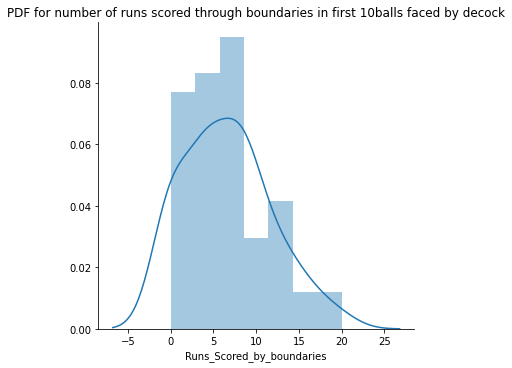

count    59.000000
mean      6.576271
std       5.106464
min       0.000000
25%       4.000000
50%       6.000000
75%      10.000000
max      20.000000
Name: Runs_Scored_by_boundaries, dtype: float64

In [141]:
#Converting above two lists into dataframe
df_Decock_runs_boundaries=  pd.DataFrame(list(zip(Decock_matchID, Decock_runs_scored)), columns =['match_id', 'Runs_Scored_by_boundaries']) 
df_Decock_runs_boundaries.head()

#Now plotting PDF 
import seaborn as sns
import matplotlib.pyplot as plt
sns.FacetGrid(df_Decock_runs_boundaries,size=5) \
   .map(sns.distplot, "Runs_Scored_by_boundaries") \
   .add_legend();

plt.title("PDF for number of runs scored through boundaries in first 10balls faced by decock")
plt.show();

#Printing Mean and Std
df_Decock_runs_boundaries['Runs_Scored_by_boundaries'].describe()

**Conclusion :-**

By looking at above PDF i can say that most of the values are 4 to 8.

So i am predicting in today match also he will score less than 10runs through boundaries.

### Q3) Which MI bowler will have the best dot balls to total balls bowled ratio?

In [238]:
#Filtering 4 mumbai bowlers who played every match in this year ipl
df_mumbai_bowlers = df_deliveries[(df_deliveries['bowler'] == 'JJ Bumrah') | (df_deliveries['bowler'] == 'TA Boult')|
                                  (df_deliveries['bowler'] == 'RD Chahar') | (df_deliveries['bowler'] == 'KH Pandya')]
df_dotballs =  df_mumbai_bowlers[df_mumbai_bowlers['total_runs'] == 0]

number_of_balls = df_mumbai_bowlers.groupby('bowler')['ball'].count()
dot_balls = df_dotballs.groupby('bowler')['ball'].count()

#Converting series object to dataframe
df_no_of_balls = number_of_balls.to_frame()
df_no_of_balls.reset_index(inplace=True)
df_dot_balls = dot_balls.to_frame()
df_dot_balls.reset_index(inplace=True)
#Joining two dataframes
df_final = pd.merge(df_no_of_balls, df_dot_balls, left_on='bowler',right_on='bowler', how='outer')
df_final.rename(columns = {'ball_x':'total_balls', 'ball_y':'dot_balls'}, inplace = True)
                              
df_final.head()


,bowler,total_balls,dot_balls
0,JJ Bumrah,1798,648
1,KH Pandya,968,300
2,RD Chahar,333,139
3,TA Boult,802,290


In [239]:
df_final['ratio'] = (df_final['dot_balls']/df_final['total_balls'])
df_final.head()

,bowler,total_balls,dot_balls,ratio
0,JJ Bumrah,1798,648,0.360400
1,KH Pandya,968,300,0.309917
2,RD Chahar,333,139,0.417417
3,TA Boult,802,290,0.361596


**Conclusion :-**

Rahul chahar and Trent boult has good dot ball ratio but as per my cricket knowledge who bowls in the powerplay has has more dot balls because fielders are inside 30 yards. 

So Generally rahul chahar will bowl in middle overs and trent boult in powerplay, So i am predicting Trent boult will bowl more dot balls.


### Q4) How many such overs will be there in a match where a 6 and 4 are scored in the same over?

In [241]:
#I am filtering out current MI and CSK matches
df_MI_CSK_bowlers = df_deliveries[((df_deliveries['batting_team'] == 'Mumbai Indians') | (df_deliveries['batting_team'] == 'Chennai Super Kings')) & 
                         ((df_deliveries['bowling_team'] == 'Mumbai Indians') | (df_deliveries['bowling_team'] == 'Chennai Super Kings'))] 
                                 
df_MI_CSK_bowlers = df_MI_CSK_bowlers[['match_id','inning','over','batsman_runs']]
df_4s6s_over = df_MI_CSK_bowlers[(df_MI_CSK_bowlers['batsman_runs'] == 4) | (df_MI_CSK_bowlers['batsman_runs'] == 6)]



In [242]:
df_4s6s_over['4s'] = np.where(df_4s6s_over.batsman_runs == 4, 1, 0)
df_4s6s_over['6s'] = np.where(df_4s6s_over.batsman_runs == 6, 1, 0)
df_4s6s_over.head()

,match_id,inning,over,batsman_runs,4s,6s
15490,67,1,1,4,1,0
15496,67,1,2,4,1,0
15498,67,1,2,4,1,0
15500,67,1,3,4,1,0
15501,67,1,3,6,0,1


In [243]:
df = df_4s6s_over.groupby(['match_id','inning','over'])['4s','6s'].apply(lambda x : x.astype(int).sum())
df.head()

4s  6s
match_id inning over        
67       1      1      1   0
                2      2   0
                3      2   1
                5      1   0
                6      2   0

In [244]:
dfd = df[(df['4s'] >= 1) & (df['6s'] >=1)]
print("Number overs gone for atleast one 4 and one 6 is",dfd.shape[0])
print("Number of matches they played",df_MI_CSK_bowlers['match_id'].nunique())

Number overs gone for atleast one 4 and one 6 is 127
Number of matches they played 28


**Conclusion :-**

On an average they conceeded 1 four and 1 six atleast 5 overs in a match. So i am predicting in today match also they will conceed 5-6 overs with one 4 and one 6.

### Q5) Calculte Bowler lethality Score(BLS) for every bowler and findout best bowler?

In [185]:
#------------------------------- chahar ----------------------------

df_chahar = df_deliveries[(df_deliveries['bowler'] == 'DL Chahar')&(df_deliveries['wide_runs'] == 0)&(df_deliveries['noball_runs'] == 0)]
df_wickets_chahar = df_chahar[(df_chahar['player_dismissed'] != 'No Wicket') & (df_chahar['dismissal_kind'] != 'run out')]
df_dot_balls_chahar = df_chahar[(df_chahar['total_runs'] == 0)]
df_boundaries_chahar = df_chahar[(df_chahar['batsman_runs'] == 4) | (df_chahar['batsman_runs'] == 6)]

no_of_wickets = df_wickets_chahar.shape[0]
no_of_dotballs = df_dot_balls_chahar.shape[0]
no_of_boundary_runs = df_boundaries_chahar['batsman_runs'].sum()
no_of_boundaries = df_boundaries_chahar['batsman_runs'].count()
no_of_balls_bowled = df_chahar.shape[0]

BLS_chahar = (no_of_wickets + no_of_dotballs - (no_of_boundary_runs/no_of_boundaries))/(no_of_balls_bowled)

#----------------------------- Jadeja ----------------------------------------

df_jadeja = df_deliveries[(df_deliveries['bowler'] == 'RA Jadeja') & (df_deliveries['wide_runs'] == 0) & (df_deliveries['noball_runs'] == 0)]
df_wickets_jadeja = df_jadeja[(df_jadeja['player_dismissed'] != 'No Wicket') & (df_jadeja['dismissal_kind'] == 'run out')]
df_dot_balls_jadeja = df_jadeja[(df_jadeja['total_runs'] == 0)]
df_boundaries_jadeja = df_jadeja[(df_jadeja['batsman_runs'] == 4) | (df_jadeja['batsman_runs'] == 6)]

no_of_wickets = df_wickets_jadeja.shape[0]
no_of_dotballs = df_dot_balls_jadeja.shape[0]
no_of_boundary_runs = df_boundaries_jadeja['batsman_runs'].sum()
no_of_boundaries = df_boundaries_jadeja['batsman_runs'].count()
no_of_balls_bowled = df_jadeja.shape[0]

BLS_jadeja = (no_of_wickets + no_of_dotballs - (no_of_boundary_runs/no_of_boundaries))/(no_of_balls_bowled)


In [186]:
#------------------------------- Bumrah ------------------------------

df_bumrah = df_deliveries[(df_deliveries['bowler'] == 'JJ Bumrah')&(df_deliveries['wide_runs'] == 0)&(df_deliveries['noball_runs'] == 0)]
df_wickets_bumrah = df_bumrah[(df_bumrah['player_dismissed'] != 'No Wicket') & (df_bumrah['dismissal_kind'] != 'run out')]
df_dot_balls_bumrah = df_bumrah[(df_bumrah['total_runs'] == 0)]
df_boundaries_bumrah = df_bumrah[(df_bumrah['batsman_runs'] == 4) | (df_bumrah['batsman_runs'] == 6)]

no_of_wickets = df_wickets_bumrah.shape[0]
no_of_dotballs = df_dot_balls_bumrah.shape[0]
no_of_boundary_runs = df_boundaries_bumrah['batsman_runs'].sum()
no_of_boundaries = df_boundaries_bumrah['batsman_runs'].count()
no_of_balls_bowled = df_bumrah.shape[0]

BLS_bumrah = (no_of_wickets + no_of_dotballs - (no_of_boundary_runs/no_of_boundaries))/(no_of_balls_bowled)

#----------------------------- Krunal Pandya ----------------------------------------

df_pandya = df_deliveries[(df_deliveries['bowler'] == 'KH Pandya') & (df_deliveries['wide_runs'] == 0) & (df_deliveries['noball_runs'] == 0)]
df_wickets_pandya = df_pandya[(df_pandya['player_dismissed'] != 'No Wicket') & (df_pandya['dismissal_kind'] == 'run out')]
df_dot_balls_pandya = df_pandya[(df_pandya['total_runs'] == 0)]
df_boundaries_pandya = df_pandya[(df_pandya['batsman_runs'] == 4) | (df_pandya['batsman_runs'] == 6)]

no_of_wickets = df_wickets_pandya.shape[0]
no_of_dotballs = df_dot_balls_pandya.shape[0]
no_of_boundary_runs = df_boundaries_pandya['batsman_runs'].sum()
no_of_boundaries = df_boundaries_pandya['batsman_runs'].count()
no_of_balls_bowled = df_pandya.shape[0]

BLS_pandya = (no_of_wickets + no_of_dotballs - (no_of_boundary_runs/no_of_boundaries))/(no_of_balls_bowled)



In [187]:
#----------------------------- Trent boult ----------------------------------------

df_boult = df_deliveries[(df_deliveries['bowler'] == 'TA Boult') & (df_deliveries['wide_runs'] == 0) & (df_deliveries['noball_runs'] == 0)]
df_wickets_boult = df_boult[(df_boult['player_dismissed'] != 'No Wicket') & (df_boult['dismissal_kind'] == 'run out')]
df_dot_balls_boult = df_boult[(df_boult['total_runs'] == 0)]
df_boundaries_boult = df_boult[(df_boult['batsman_runs'] == 4) | (df_boult['batsman_runs'] == 6)]

no_of_wickets = df_wickets_boult.shape[0]
no_of_dotballs = df_dot_balls_boult.shape[0]
no_of_boundary_runs = df_boundaries_boult['batsman_runs'].sum()
no_of_boundaries = df_boundaries_boult['batsman_runs'].count()
no_of_balls_bowled = df_boult.shape[0]

BLS_boult = (no_of_wickets + no_of_dotballs - (no_of_boundary_runs/no_of_boundaries))/(no_of_balls_bowled)

#----------------------------- Rahul Chahar ----------------------------------------

df_rahul = df_deliveries[(df_deliveries['bowler'] == 'RD Chahar') & (df_deliveries['wide_runs'] == 0) & (df_deliveries['noball_runs'] == 0)]
df_wickets_rahul = df_rahul[(df_rahul['player_dismissed'] != 'No Wicket') & (df_rahul['dismissal_kind'] == 'run out')]
df_dot_balls_rahul = df_rahul[(df_rahul['total_runs'] == 0)]
df_boundaries_rahul = df_rahul[(df_rahul['batsman_runs'] == 4) | (df_rahul['batsman_runs'] == 6)]

no_of_wickets = df_wickets_rahul.shape[0]
no_of_dotballs = df_dot_balls_rahul.shape[0]
no_of_boundary_runs = df_boundaries_rahul['batsman_runs'].sum()
no_of_boundaries = df_boundaries_rahul['batsman_runs'].count()
no_of_balls_bowled = df_rahul.shape[0]

BLS_rahul = (no_of_wickets + no_of_dotballs - (no_of_boundary_runs/no_of_boundaries))/(no_of_balls_bowled)

In [199]:
#----------------------------- Shrdul Thakur ----------------------------------------

df_thakur = df_deliveries[(df_deliveries['bowler'] == 'SN Thakur') & (df_deliveries['wide_runs'] == 0) & (df_deliveries['noball_runs'] == 0)]
df_wickets_thakur = df_thakur[(df_thakur['player_dismissed'] != 'No Wicket') & (df_thakur['dismissal_kind'] == 'run out')]
df_dot_balls_thakur = df_thakur[(df_thakur['total_runs'] == 0)]
df_boundaries_thakur = df_thakur[(df_thakur['batsman_runs'] == 4) | (df_thakur['batsman_runs'] == 6)]

no_of_wickets = df_wickets_thakur.shape[0]
no_of_dotballs = df_dot_balls_thakur.shape[0]
no_of_boundary_runs = df_boundaries_thakur['batsman_runs'].sum()
no_of_boundaries = df_boundaries_thakur['batsman_runs'].count()
no_of_balls_bowled = df_thakur.shape[0]

BLS_thakur = (no_of_wickets + no_of_dotballs - (no_of_boundary_runs/no_of_boundaries))/(no_of_balls_bowled)

#----------------------------- Imran Tahir ----------------------------------------

df_tahir = df_deliveries[(df_deliveries['bowler'] == 'Imran Tahir') & (df_deliveries['wide_runs'] == 0) & (df_deliveries['noball_runs'] == 0)]
df_wickets_tahir = df_tahir[(df_tahir['player_dismissed'] != 'No Wicket') & (df_tahir['dismissal_kind'] == 'run out')]
df_dot_balls_tahir = df_tahir[(df_tahir['total_runs'] == 0)]
df_boundaries_tahir= df_tahir[(df_tahir['batsman_runs'] == 4) | (df_tahir['batsman_runs'] == 6)]

no_of_wickets = df_wickets_tahir.shape[0]
no_of_dotballs = df_dot_balls_tahir.shape[0]
no_of_boundary_runs = df_boundaries_tahir['batsman_runs'].sum()
no_of_boundaries = df_boundaries_tahir['batsman_runs'].count()
no_of_balls_bowled = df_tahir.shape[0]

BLS_tahir = (no_of_wickets + no_of_dotballs - (no_of_boundary_runs/no_of_boundaries))/(no_of_balls_bowled)

In [204]:
print("Name                 BLS")
print("Deepak Chahar     ",BLS_chahar)
print("Ravindra Jadeja   ",BLS_jadeja)
print("Jasprith Bumrah   ",BLS_bumrah)
print("Krunal Pandya     ",BLS_pandya)
print("Trent Boult       ",BLS_boult)
print("Rahul Chahar      ",BLS_rahul)
print("Shardul Thakur    ",BLS_thakur)
print("Imran Tahir       ",BLS_tahir)


Name                 BLS
Deepak Chahar      0.5160998552821997
Ravindra Jadeja    0.3271441395540675
Jasprith Bumrah    0.41670907196816653
Krunal Pandya      0.3157729157729158
Trent Boult        0.3771720070141878
Rahul Chahar       0.4138741916519694
Shardul Thakur     0.3706618240516546
Imran Tahir        0.3293375247409477


**Conclusion :-**

Deepak chahar has the highest BLS till now in IPL among MI and CSK bowlers.

So i am predicting in today match as well Deepak chahar will have highest bowling lethality score compare to all othe bowlers.